In [1]:
from transformers import AutoTokenizer
from src.datasets import TextConcatFactCheck, TextConcatPosts
from src import config
posts = TextConcatPosts(config.POSTS_PATH, config.TASKS_PATH, "monolingual", gs_path= config.GS_PATH)
facts = TextConcatFactCheck(config.FACT_CHECKS_PATH, config.TASKS_PATH, "monolingual")

df_post_dev = posts.df_dev
df_fc = facts.df

tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-mpnet-base-v2")

post_count = [len(tokenizer.tokenize(text)) for text in df_post_dev["full_text"].tolist()]
fact_count = [len(tokenizer.tokenize(text)) for text in df_fc["full_text"].tolist()]


Token indices sequence length is longer than the specified maximum sequence length for this model (553 > 512). Running this sequence through the model will result in indexing errors


In [3]:
mean_len_posts = sum(post_count) / len(post_count)
mean_len_facts = sum(fact_count) / len(fact_count)

max_len_posts = max(post_count)
max_len_facts = max(fact_count)

In [4]:
print(f"Mean length of posts: {mean_len_posts}")
print(f"Mean length of facts: {mean_len_facts}\n")

print(f"Max length of posts: {max_len_posts}")
print(f"Max length of facts: {max_len_facts}")

Mean length of posts: 129.15339233038347
Mean length of facts: 38.38002426108662

Max length of posts: 1062
Max length of facts: 852


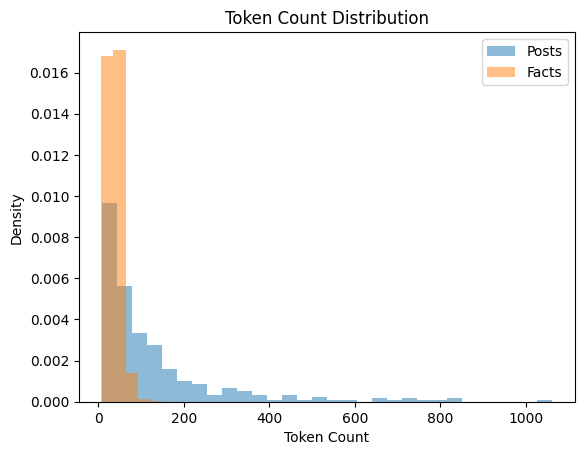

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(post_count, bins=30, alpha=0.5, label='Posts', density= True)
plt.hist(fact_count, bins=30, alpha=0.5, label='Facts', density= True)
plt.xlabel('Token Count')
plt.ylabel('Density')
plt.title('Token Count Distribution')
plt.legend(loc='upper right')
plt.show()


In [9]:
# calculate percentage of posts and facts that are longer than 512 tokens
long_posts = len([count for count in post_count if count > 512])
long_facts = len([count for count in fact_count if count > 512])
total_posts = len(post_count)
total_facts = len(fact_count)
print(f"Percentage of posts longer than 512 tokens: {long_posts / total_posts * 100:.4f}%")
print(f"Percentage of facts longer than 512 tokens: {long_facts / total_facts * 100:.4f}%")
print(f"Total number of posts: {total_posts}")
print(f"Total number of facts: {total_facts}")

Percentage of posts longer than 512 tokens: 3.5398%
Percentage of facts longer than 512 tokens: 0.0035%
Total number of posts: 339
Total number of facts: 85734
